In [1]:
import tess_cpm
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS

In [276]:
# fits_file = "provided_sources/tess-s0005-1-3_70.445653_7.275704_64x64_astrocut.fits"
fits_file = "provided_sources/tess-s0005-1-3_72.267451_8.981257_64x64_astrocut.fits"
# fits_file = "provided_sources/tess-s0005-1-3_71.975577_7.370718_64x64_astrocut.fits"
# fits_file = "provided_sources/tess-s0006-1-1_84.180039_3.774854_64x64_astrocut.fits"
# fits_file = "provided_sources/tess-s0002-1-3_357.154800_-15.211056_64x64_astrocut.fits"

In [277]:
cpm = tess_cpm.CPM(fits_file, remove_bad=True)

Removing 23 bad values by using the TESS provided "QUALITY" array


In [278]:
cpm.set_target(32, 32)
cpm.set_exclusion(10)
cpm.set_predictor_pixels(128*8)
# cpm.set_poly_model(1, 4, 0.1)

In [279]:
cpm.lsq(0.1, rescale=True, polynomials=False)

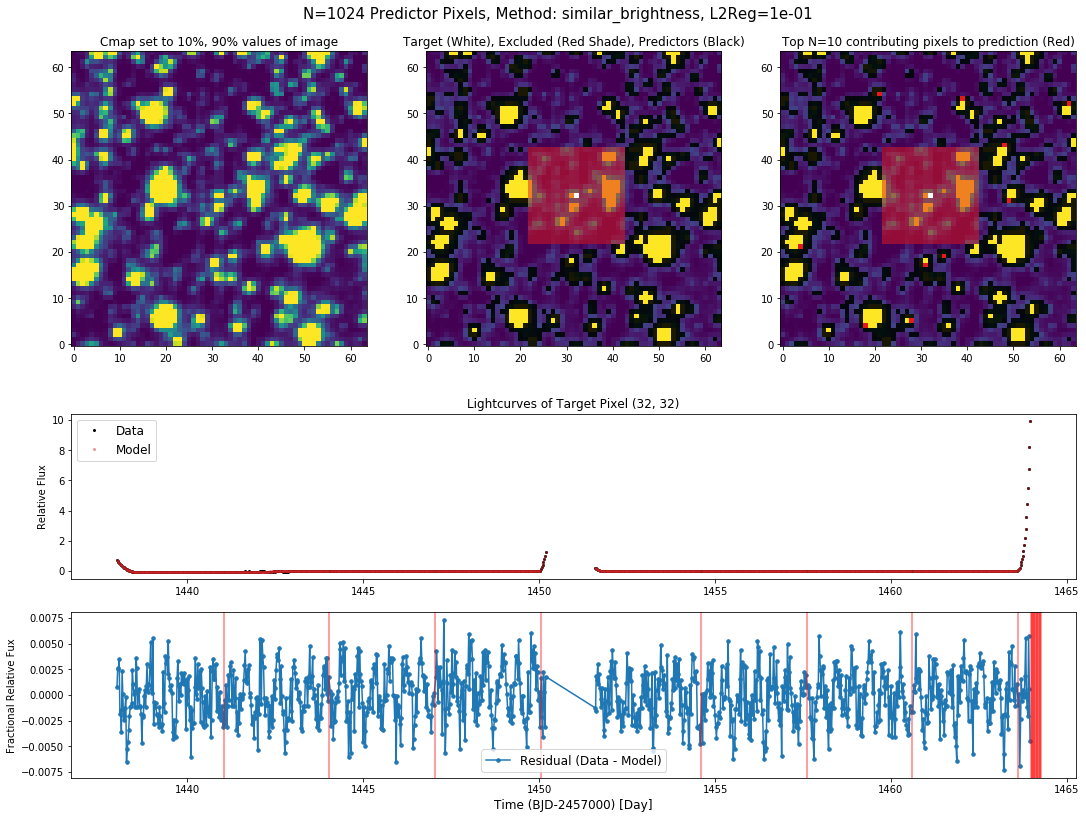

In [280]:
tess_cpm.summary_plot(cpm, 10)

In [171]:
cpm.sigma_clip_process(sigma=3)

Iteration 1: Removing 9 data points
Iteration 2: Removing 4 data points


In [281]:
import lightkurve as lk

In [282]:
lc = lk.LightCurve(time=cpm.time, flux=cpm.rescaled_target_fluxes - cpm.lsq_prediction)

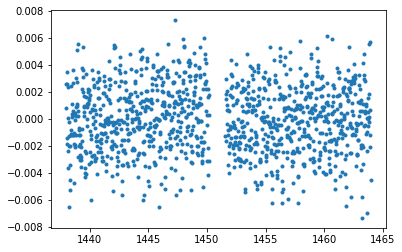

In [283]:
plt.plot(lc.time, lc.flux, ".")

In [284]:
pg = lc.to_periodogram(oversample_factor=1)

/home/soichiro/miniconda3/envs/daily/lib/python3.7/site-packages/astropy/units/quantity.py:466: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


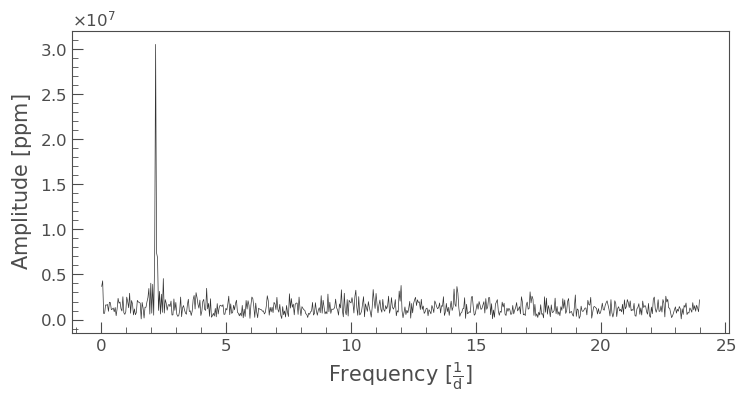

In [285]:
pg.plot()

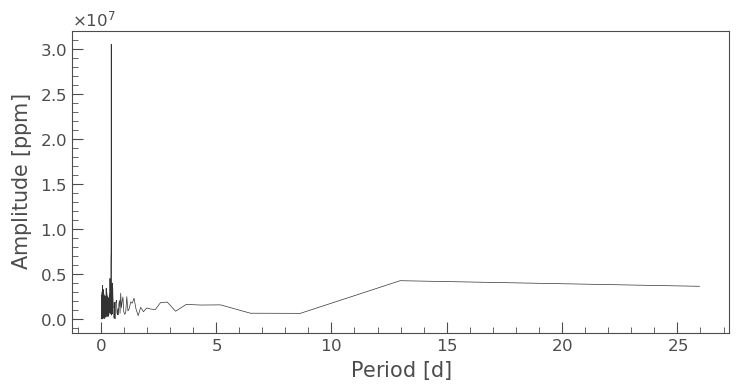

In [286]:
pg.plot(view='period')

0.45541328296326755 d


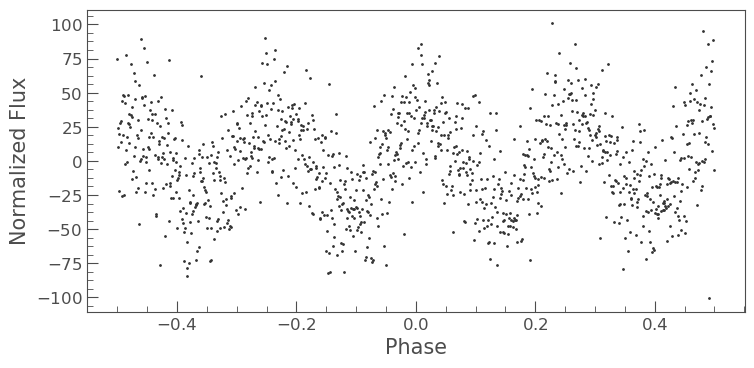

In [287]:
period = pg.period_at_max_power
print(period)
lc.fold(period.value*4).scatter()